In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import joblib
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [165]:
df = pd.read_csv('weatherdata.csv')


In [166]:
df.head(10)

,STT,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,1,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,2,27.879734,46.489704,5.952484,4.990053,992.614189,no rain
2,3,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,4,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,5,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
5,6,26.147353,48.217260,15.258547,59.766279,1049.738751,no rain
6,7,20.939680,40.799444,2.232566,45.827508,1014.173766,no rain
7,8,32.294325,51.848471,2.873621,92.551497,1006.041733,no rain
8,9,34.091569,48.057114,5.570206,82.524873,993.732047,no rain
9,10,19.586038,82.978293,5.760537,98.014450,1036.503457,rain


In [167]:
print("Data Shape:", df.shape)
print("Dataset: \n")
display(df.head())
print("Dataset Information: \n")
train_info = df.info()
display(train_info)
print("Dataset Statistical Summary: \n")
display(df.describe().T)

Data Shape: (2500, 7)
Dataset: 



,STT,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,1,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,2,27.879734,46.489704,5.952484,4.990053,992.614189,no rain
2,3,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,4,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,5,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STT          2500 non-null   int64  
 1   Temperature  2500 non-null   float64
 2   Humidity     2500 non-null   float64
 3   Wind_Speed   2500 non-null   float64
 4   Cloud_Cover  2500 non-null   float64
 5   Pressure     2500 non-null   float64
 6   Rain         2500 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 136.8+ KB


None

Dataset Statistical Summary: 



,count,mean,std,min,25%,50%,75%,max
STT,2500.0,1250.500000,721.832160,1.000000,625.750000,1250.500000,1875.250000,2500.000000
Temperature,2500.0,22.581725,7.326996,10.001842,16.359398,22.536448,28.976476,34.995214
Humidity,2500.0,64.347094,19.954739,30.005071,47.339815,63.920797,81.561021,99.997481
Wind_Speed,2500.0,9.906255,5.780316,0.009819,4.761909,9.908572,14.948408,19.999132
Cloud_Cover,2500.0,49.658104,29.123104,0.015038,23.900016,49.488284,75.324140,99.997795
Pressure,2500.0,1014.312336,20.196433,980.014486,996.938630,1013.433035,1031.735067,1049.985593


In [168]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 STT            0
Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


In [169]:
print("Duplicates:\n", df.duplicated().sum())

Duplicates:
 0


In [170]:
print("Value in dataset: \n", df.nunique())

Value in dataset: 
 STT            2500
Temperature    2500
Humidity       2500
Wind_Speed     2500
Cloud_Cover    2500
Pressure       2500
Rain              2
dtype: int64


In [171]:
numerical_df = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_df = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print("\nNumerical columns in the dataset:")
print(numerical_df)

print("\nNon-numerical columns in the dataset:")
print(non_numerical_df)



Numerical columns in the dataset:
['STT', 'Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

Non-numerical columns in the dataset:
['Rain']


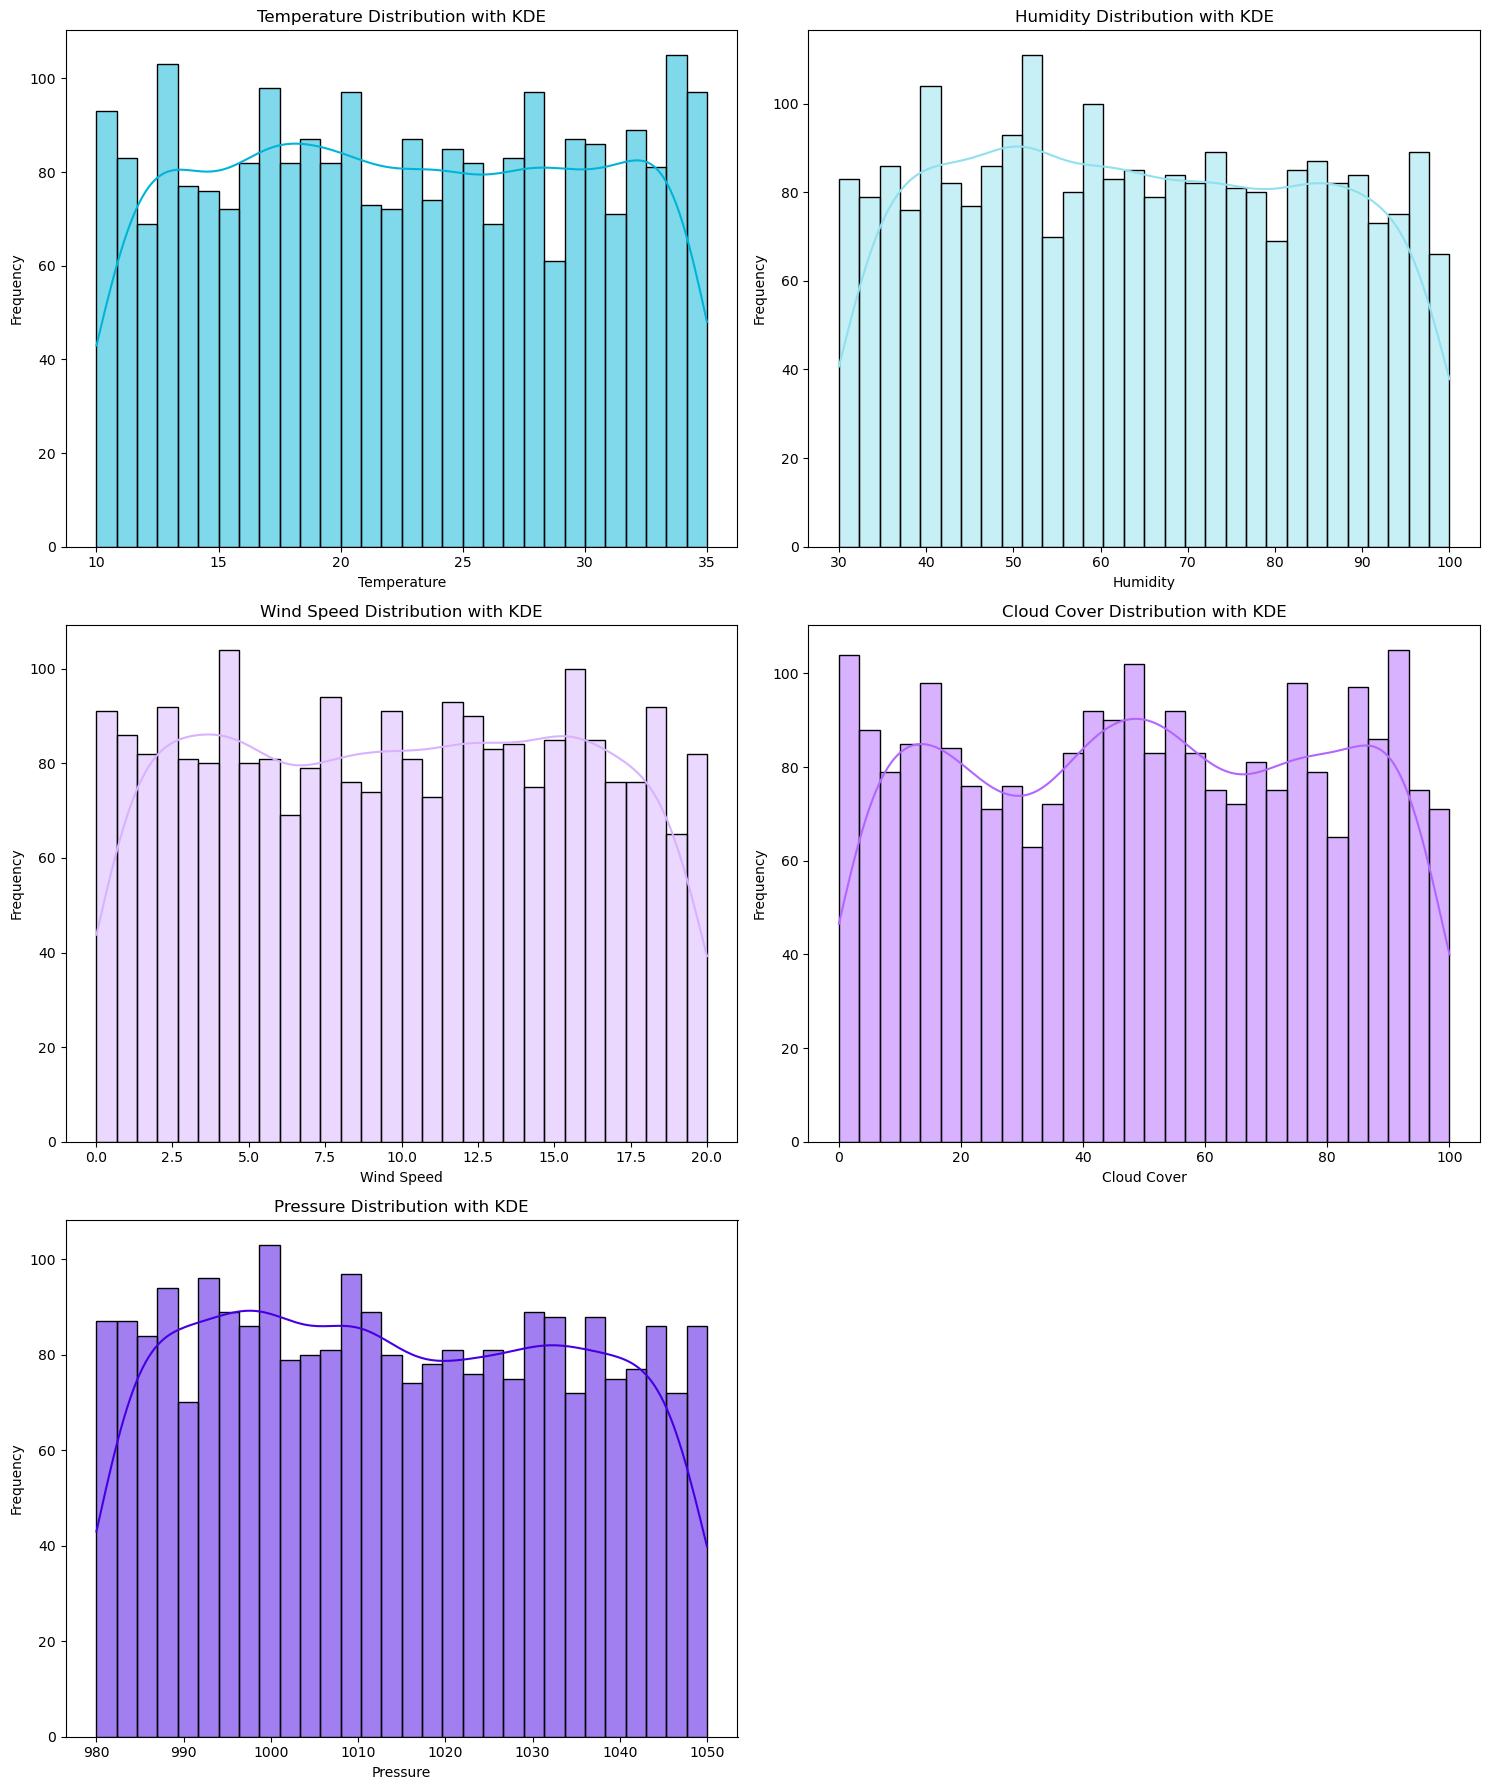

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = ['#0077b6', '#00b4d8', '#90e0ef','#d8b2ff', '#b266ff', '#4500e2' ]  
cmap = LinearSegmentedColormap.from_list("custom_blue_purple", colors, N=256)

sns.set_palette(sns.color_palette(colors))

def univariate_analysis(data, columns):
    plt.figure(figsize=(15, 18))  
    
    for i, column in enumerate(columns, 1):
        plt.subplot(3, 2, i)  
        sns.histplot(data[column], kde=True, bins=30, color=colors[i % len(colors)])  # Use cyclic color indexing
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

univariate_analysis(df, columns_to_analyze)


<Figure size 800x500 with 0 Axes>

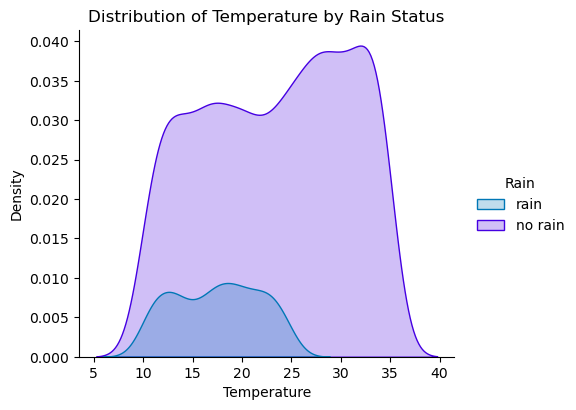

<Figure size 800x500 with 0 Axes>

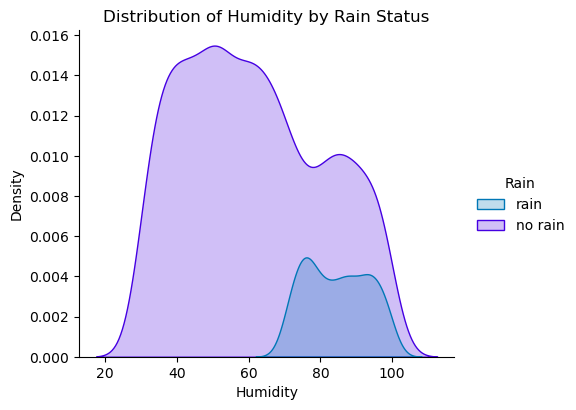

<Figure size 800x500 with 0 Axes>

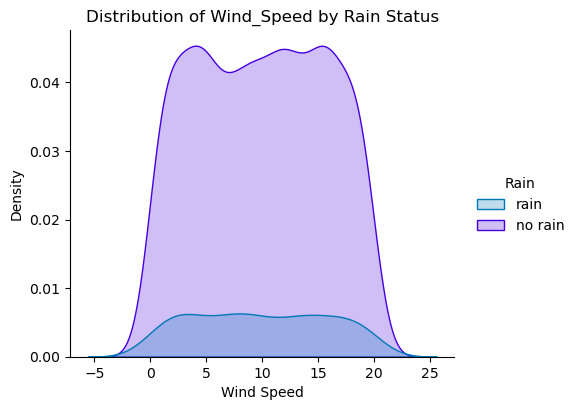

<Figure size 800x500 with 0 Axes>

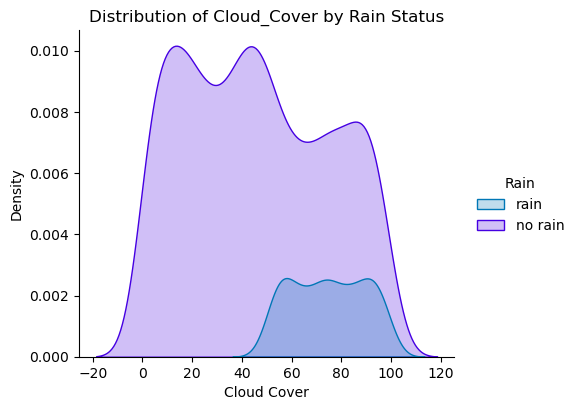

<Figure size 800x500 with 0 Axes>

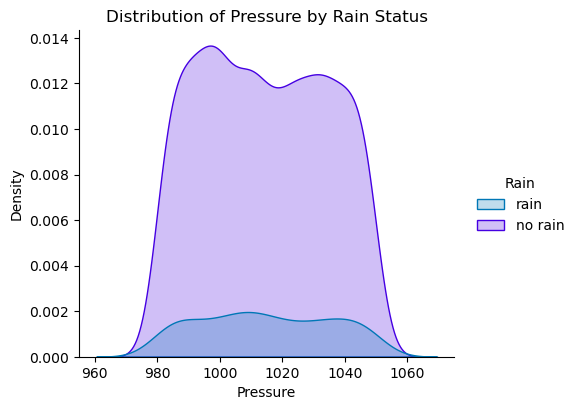

In [173]:
for column in columns_to_analyze:
    plt.figure(figsize=(8, 5))
    color_selection = [colors[0], colors[5]] 
    
    sns.displot(
        data=df,
        x=column,
        hue="Rain",
        kind="kde",
        fill=True,
        palette=color_selection,  
        height=4,
        aspect=1.2
    )
    
    plt.title(f'Distribution of {column} by Rain Status')
    plt.xlabel(column.replace('_', ' '))
    plt.ylabel('Density')
    plt.show()


In [174]:
df.head()

,STT,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,1,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,2,27.879734,46.489704,5.952484,4.990053,992.614189,no rain
2,3,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,4,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,5,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [175]:
df.dropna(inplace=True)
df['Rain'] = df['Rain'].map({'no rain': 0, 'rain': 1})


In [176]:
correlation_matrix = df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure', 'Rain']].corr()

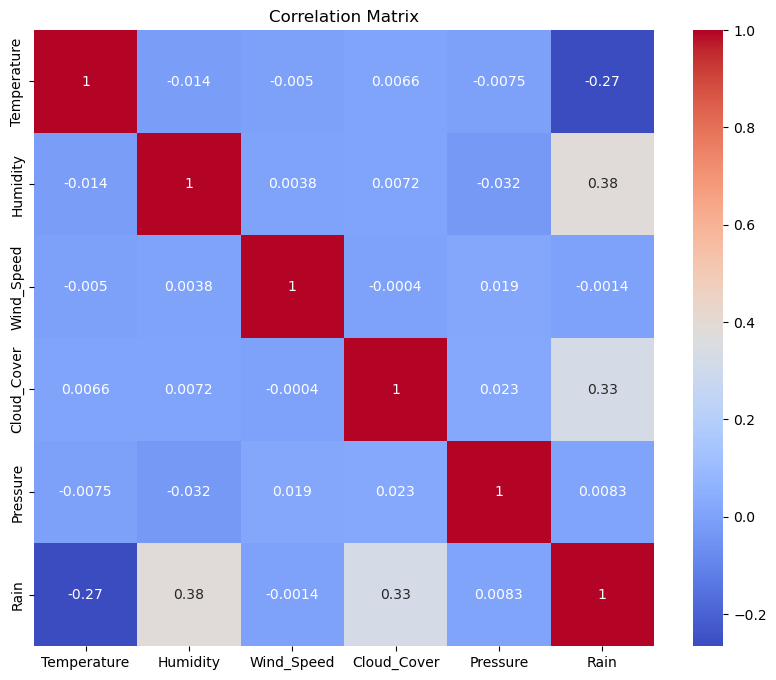

In [177]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [178]:
df.head(10)

,STT,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,1,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,2,27.879734,46.489704,5.952484,4.990053,992.614189,0
2,3,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,4,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,5,20.591370,96.858822,4.643921,47.676444,980.825142,0
5,6,26.147353,48.217260,15.258547,59.766279,1049.738751,0
6,7,20.939680,40.799444,2.232566,45.827508,1014.173766,0
7,8,32.294325,51.848471,2.873621,92.551497,1006.041733,0
8,9,34.091569,48.057114,5.570206,82.524873,993.732047,0
9,10,19.586038,82.978293,5.760537,98.014450,1036.503457,1


In [179]:
X = df[['Temperature','Humidity','Wind_Speed','Cloud_Cover','Pressure']]
Y = df['Rain']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [181]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [182]:
df.head()

,STT,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,1,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,2,27.879734,46.489704,5.952484,4.990053,992.614189,0
2,3,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,4,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,5,20.591370,96.858822,4.643921,47.676444,980.825142,0


In [183]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [184]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [185]:
y_pred = model.predict(X_test)

In [186]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [187]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      0.98      0.99        57

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500



In [188]:
joblib.dump(model, 'rd_model.pkl')

['rd_model.pkl']

In [189]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [190]:

model_keras = keras.Sequential([
    keras.layers.Input(shape=(5,)), 
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [191]:
model_keras.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])


In [192]:
model_keras.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

In [193]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_keras)
tflite_model = converter.convert()


INFO:tensorflow:Assets written to: C:\Users\ADMIN\AppData\Local\Temp\tmp14ioh2ar\assets


INFO:tensorflow:Assets written to: C:\Users\ADMIN\AppData\Local\Temp\tmp14ioh2ar\assets


Saved artifact at 'C:\Users\ADMIN\AppData\Local\Temp\tmp14ioh2ar'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor_18')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2559160037648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2559160035536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2559160029392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2559160027856: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [194]:
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


In [195]:
with open("model.tflite", "rb") as f:
    data = f.read()

In [196]:
with open("model_data.h", "w") as f:
    f.write("#ifndef MODEL_DATA_H\n#define MODEL_DATA_H\n\n")
    f.write("const unsigned char model_tflite[] = {")
    f.write(",".join(map(str, data)))
    f.write("};\n\nconst unsigned int model_tflite_len = " + str(len(data)) + ";\n\n")
    f.write("#endif // MODEL_DATA_H")